<a href="https://colab.research.google.com/github/poudelef/Binary-CNN-Model/blob/main/CNN_Introduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load drive helper and mount
from google.colab import drive

In [2]:
# This will ask for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'Colab Notebooks'		    pizza_steak
 multiple_linear_regression.ipynb   simple_linear_regression-checkpoint.ipynb


In [4]:
!ls "/content/drive/My Drive/pizza_steak"

'Custom Images'   test	 train


In [5]:
!ls "/content/drive/My Drive/pizza_steak/train"

pizza  steak


In [6]:
!ls "/content/drive/My Drive/pizza_steak/train/steak"

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
from posixpath import dirname
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('/content/drive/My Drive/pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} iamges in '{dirpath}'")


There are 3 directories and 0 iamges in '/content/drive/My Drive/pizza_steak'
There are 2 directories and 0 iamges in '/content/drive/My Drive/pizza_steak/train'
There are 0 directories and 750 iamges in '/content/drive/My Drive/pizza_steak/train/pizza'
There are 0 directories and 750 iamges in '/content/drive/My Drive/pizza_steak/train/steak'
There are 2 directories and 0 iamges in '/content/drive/My Drive/pizza_steak/test'
There are 0 directories and 250 iamges in '/content/drive/My Drive/pizza_steak/test/pizza'
There are 0 directories and 250 iamges in '/content/drive/My Drive/pizza_steak/test/steak'
There are 0 directories and 6 iamges in '/content/drive/My Drive/pizza_steak/Custom Images'


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + "/" + target_class

  # Get a random images path
  random_images = random.sample(os.listdir(target_folder), 1)
  print(random_images)

  img = mpimg.imread(target_folder + "/" + random_images[0])
  # random_images is list so we index it to get a string value
  plt.imshow(img)
  plt.axis('off')
  plt.title(target_class)
  print(img.shape)
  print(img.size)
  return img

['972000.jpg']
(512, 512, 3)
786432


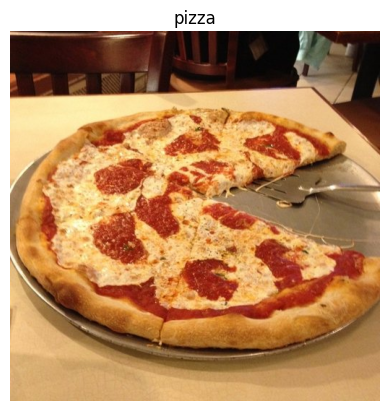

In [9]:
img = view_random_images('/content/drive/My Drive/pizza_steak/train', 'pizza')

#  An end to end example

In [10]:
# Building a convolution neural network to find patterns in our images
 # Load images
 # preprocess our iamges
 # Build a CNN to find patterns in our images
 # Fit the CNN to our training data
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# preprocess data get all the pixel value betwen 0 and 1, this is also called scaling/normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Path
train_dir = '/content/drive/MyDrive/pizza_steak/train'
test_dir = '/content/drive/MyDrive/pizza_steak/test'


# Now we will import our data from directories and trun it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224), # Reshape all the image in (224, 224) -- comman img size
    batch_size=32,
    class_mode='binary',
    seed = 42
)

valid_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224), # Reshape all the image in (224, 224) -- comman img size
    batch_size=32,
    class_mode='binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from threading import active_count
# Building a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilie our CNN
model_1.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
# Lables and data (X and y) get created for us in train_data objcect by flow_from_directory.
model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 978s 21s/step - accuracy: 0.4981 - loss: 0.7057 - val_accuracy: 0.6320 - val_loss: 0.6211
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - accuracy: 0.6634 - loss: 0.6222 - val_accuracy: 0.7240 - val_loss: 0.5520
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.7644 - loss: 0.5278 - val_accuracy: 0.8200 - val_loss: 0.4184
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.8124 - loss: 0.4272 - val_accuracy: 0.8240 - val_loss: 0.4208
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.8233 - loss: 0.3951 - val_accuracy: 0.8400 - val_loss: 0.3841


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Trying our data set in different model. Not Conv2D layer. We will ho2 Conv2D is far better for identifying patterns in data compared to dense neural network.

In [ ]:
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_2.compile(loss= 'binary_crossentropy' ,
    optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
model_2.fit(train_data,
                       epochs = 5,
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.4869 - loss: 1.3100 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.4814 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.4953 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

### Binary Classification: Step by step process of above process

1. Become one with the data, visualize
2. Preprocess the data(prepare dara for our model, scaling/ normalizing)
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model


## 1. Understand the data


['444709.jpg']
(512, 512, 3)
786432
['2285269.jpg']
(512, 512, 3)
786432


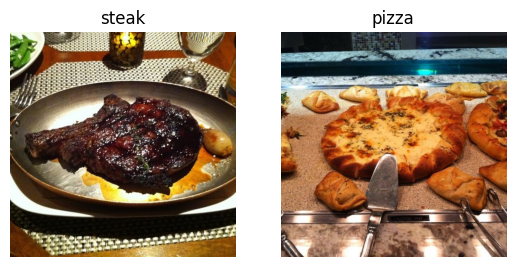

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_images("/content/drive/My Drive/pizza_steak/train", 'steak')
plt.subplot(1,2,2)
pizza_steak = view_random_images('/content/drive/My Drive/pizza_steak/train','pizza')

## 2. Preprocess the data (Preparing the data for the model)

In [ ]:
train_dir = "/content/drive/My Drive/pizza_steak/train"
test_dir = "/content/drive/My Drive/pizza_steak/test"

##### Next step is to turn our data into batches

A batches are small subset of data. rather than looking at entire 10,000 of images at a time. a model might look at 32 at a time. It's like eating a slice of pizza insted of eating the pizza at once.

We do this becaue
1. 10,000 images or more might not fit into the memory of processor (GPU)
2. trying to learn the pattern in 10,000 images at once could result in bad model(model not being able to learn)


In [ ]:
# GPU
!nvidia-smi

Wed Apr 23 17:04:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P0             30W /   70W |    1690MiB /  15360MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Create train and text data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32,

                                               )
test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32,
                                            )

# we have 1500 images so 32 bacthes size means 1500/32 = 47. one batch has 32 images and there are total 47 batches

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# See the sample of training batch
images, label = next(train_data)
len(images), len(label)

(32, 32)

In [ ]:
# Get the first imaeges
images[:1]

array([[[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.11764707],
         [0.15686275, 0.00784314, 0.10588236]],

        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],

        [[0.26666668, 0.13333334, 0.19607845],
         [0.32941177, 0.20000002, 0.23529413],
         [0.42352945, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.13333334],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],

        ...,

        [[0.62352943, 0.5803922 , 0.5647059 ],
         [0.6039216 , 0.56078434, 0.54509807]

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
label

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

In [ ]:
# Creating a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_3 = Sequential([
    Conv2D(filters = 10, # filter is the number of sliding window going across an input (higher = more complex layer)
           kernel_size = 3, # kernal_size is the size of siliing window going across an inpur
           strides = 1, # the size of steps the sliding window takes across an input
           padding = 'valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation = 'relu',
           input_shape = (224,224,3)), # this is input layer we need to specify input shape
    Conv2D(10,3, activation= 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid') # we only have one output neuron. - binary classifiaction
])

In [ ]:
## Compile the model

model_3.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs= 5 ,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.6108 - loss: 1.2907 - val_accuracy: 0.6160 - val_loss: 0.6624
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.7580 - loss: 0.5343 - val_accuracy: 0.7920 - val_loss: 0.4556
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.8134 - loss: 0.4234 - val_accuracy: 0.7680 - val_loss: 0.4955
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.8575 - loss: 0.3496 - val_accuracy: 0.8120 - val_loss: 0.3961
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9305 - loss: 0.2267 - val_accuracy: 0.7260 - val_loss: 0.5247


#### Evaluating the model

<Axes: >

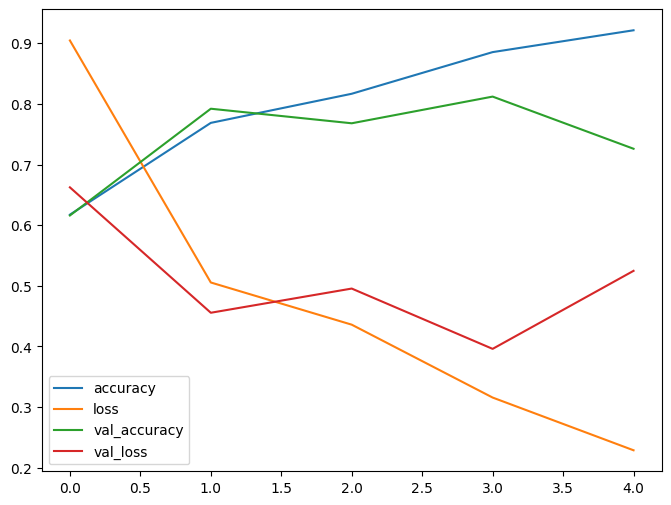

In [ ]:
# Plotting training curves
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(8,6))

# when validation cruve starts to increase it is likely that the model is overfitting the training dataset. this means, it is learning the
# patterns in the training data set to owell and it will perform bad on unseen data

# Adjusting the model parameters

Fiting a machine learning model in 3 stepas
1. crete a baseline
2. Beat the baseline by overfitting a larger model
3. reduce overfitting

Ways to induce overfitting

1. Increase the number of conv layers
2. Invreaing the number of conv filters
3. Add another dense layer to the output of outer flattened layers

Reduce overfitting (regularization)
1. Add data augmentation
2. Add regularization layers (such as Maxpool2D)
3. Add more data

In [ ]:
# create a model. - new baseline
model_4 = Sequential([
    Conv2D(10,3,input_shape= (224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## While convolution layer find the features in Images, Max pooling find the most important part in the images.

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Complie the model
model_4.compile(
    loss = 'binary_crossentropy',
    metrics= ['accuracy'],
    optimizer = Adam()

)

In [ ]:
history_4= model_4.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - accuracy: 0.6180 - loss: 0.6588 - val_accuracy: 0.7480 - val_loss: 0.5150
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.7893 - loss: 0.4649 - val_accuracy: 0.8520 - val_loss: 0.3965
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8195 - loss: 0.4075 - val_accuracy: 0.8400 - val_loss: 0.3682
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.8412 - loss: 0.3892 - val_accuracy: 0.8500 - val_loss: 0.3540
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.8330 - loss: 0.3850 - val_accuracy: 0.8740 - val_loss: 0.3376


<Axes: >

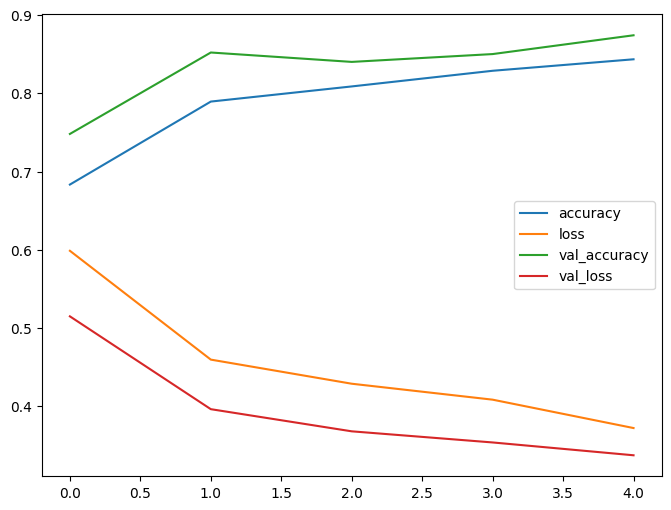

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(8,6))

# Data augmentation

1. changing shape, size or other property of data - increases diversity and allows machine to learn more generilisation pattern

2. Data augmentaion usually only happens in training data

In [11]:
# Create ImageDataGenerator training instance with data augmentation
train_data_augmentaion = ImageDataGenerator(
    rescale =1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True
)

train_data_augmentaion = train_data_augmentaion.flow_from_directory(
    train_dir,
    target_size = (224,224), # Reshape all the image in (224, 224) -- comman img size
    batch_size=32,
    class_mode='binary',
    seed = 42,
    shuffle = True # Try False
)

# Non augmented train data batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224), # Reshape all the image in (224, 224) -- comman img size
    batch_size=32,
    class_mode='binary',
    seed = 42,
    shuffle = True # Try False = results in poor accuracy. because if shuffle is false it goes through all pizza data and goes to steak data. if suffel if true it goes pizza steak-pizza-steak-data
)

# Non augmented test data batches
test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224), # Reshape all the image in (224, 224) -- comman img size
    batch_size=32,
    class_mode='binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, label = next(train_data)
augmented_images , augmented_labels =next(train_data_augmentaion)
print(len(images)), print(len(label))
len(augmented_images), len(augmented_labels)

32
32


(32, 32)

Random number : 25


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

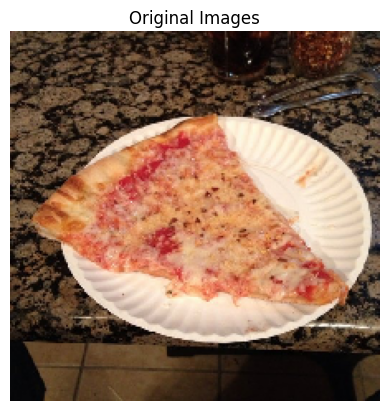

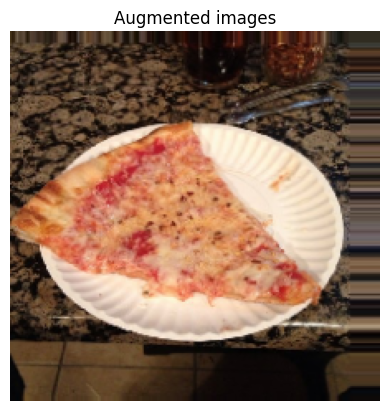

In [ ]:
# Show images randomly
import random
random_num = random.randint(0,32) # 32 batches
print(f"Random number : {random_num}")
plt.imshow(images[random_num])
plt.title("Original Images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_num])
plt.title('Augmented images')
plt.axis(False)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam
# Create a model
model_5 = Sequential([
    Conv2D(50,3,activation= 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(50,3,activation='relu'),
    MaxPool2D(),
    Conv2D(50,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the model
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_5 = model_5.fit(
    train_data_augmentaion,
    epochs = 5,
    steps_per_epoch = len(train_data_augmentaion),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 466s 10s/step - accuracy: 0.5612 - loss: 0.6830 - val_accuracy: 0.7720 - val_loss: 0.5715
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 550ms/step - accuracy: 0.6779 - loss: 0.6038 - val_accuracy: 0.7940 - val_loss: 0.4355
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 566ms/step - accuracy: 0.6967 - loss: 0.5805 - val_accuracy: 0.8060 - val_loss: 0.4203
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 530ms/step - accuracy: 0.7260 - loss: 0.5282 - val_accuracy: 0.8160 - val_loss: 0.3869
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 548ms/step - accuracy: 0.7646 - loss: 0.5239 - val_accuracy: 0.8620 - val_loss: 0.3608


<Axes: >

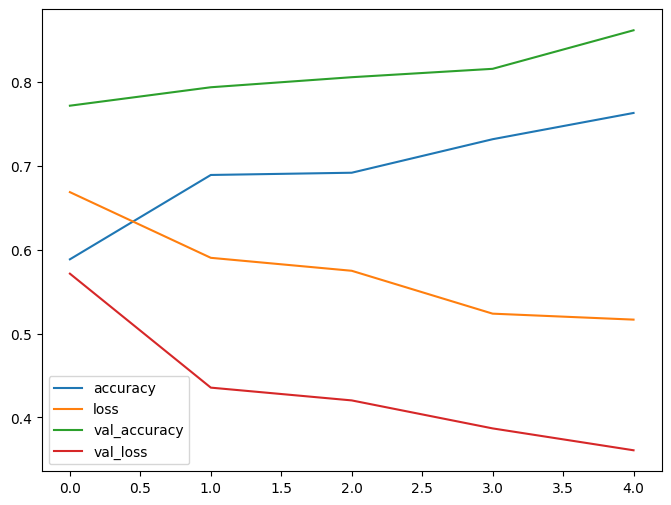

In [ ]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(8,6))

## Improving model performance


In [20]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense
from tensorflow.keras.optimizers import Adam

model_6 = Sequential([
    Conv2D(32,3,activation = 'relu',input_shape = (224,224,3)),
    BatchNormalization(), # Helps with faster training and better convergence
     MaxPool2D(pool_size=2),
    Conv2D(62,3,activation='relu'),
    Conv2D(128,3,activation='relu'),
    MaxPool2D(pool_size=3),
    Dropout(0.5),
    Conv2D(256,2,activation='relu'),
    # Flatten(),
    GlobalAveragePooling2D(),# Using this instead of Flatten more powerful
    Dense(1,activation='sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                metrics = ['accuracy'],
                optimizer = Adam())

histry_6 = model_6.fit(
    train_data_augmentaion,
    epochs = 20,
    steps_per_epoch = len(train_data_augmentaion),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 813s 17s/step - accuracy: 0.6153 - loss: 0.6659 - val_accuracy: 0.6080 - val_loss: 0.6809
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 603ms/step - accuracy: 0.7356 - loss: 0.5324 - val_accuracy: 0.6400 - val_loss: 0.6685
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 599ms/step - accuracy: 0.7744 - loss: 0.5207 - val_accuracy: 0.7040 - val_loss: 0.6230
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 598ms/step - accuracy: 0.7854 - loss: 0.4371 - val_accuracy: 0.5960 - val_loss: 0.6656
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 594ms/step - accuracy: 0.7969 - loss: 0.4497 - val_accuracy: 0.7960 - val_loss: 0.5893
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 596ms/step - accuracy: 0.8046 - loss: 0.4528 - val_accuracy: 0.8040 - val_loss: 0.5173
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 584ms/step - accuracy: 0.7883 - loss: 0.4707 - val_accuracy: 0.7020 - val_loss: 0.5550
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 585ms/step - accuracy: 0.8249 - loss: 0.4052 - val_accur

<Axes: >

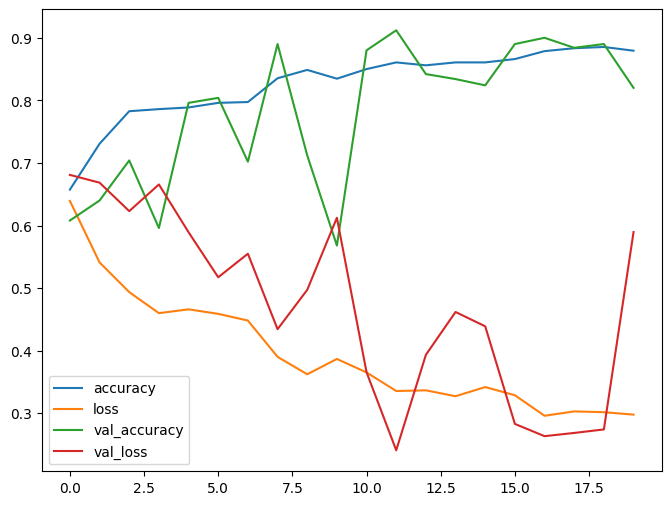

In [21]:
import pandas as pd
pd.DataFrame(histry_6.history).plot(figsize=(8,6))

## Testing the model with our own custom data

In [22]:
!ls "/content/drive/My Drive/pizza_steak"

'Custom Images'   test	 train


In [23]:
!ls "/content/drive/My Drive/pizza_steak/Custom Images"

pizza_1.jpg  pizza_2.jpg  pizza_3.jpg  steak_1.jpg  steak_2.jpg  steak_3.jpg


In [24]:
import os
import matplotlib.pyplot as plt
os.chdir('/content/drive/My Drive/pizza_steak/Custom Images')

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

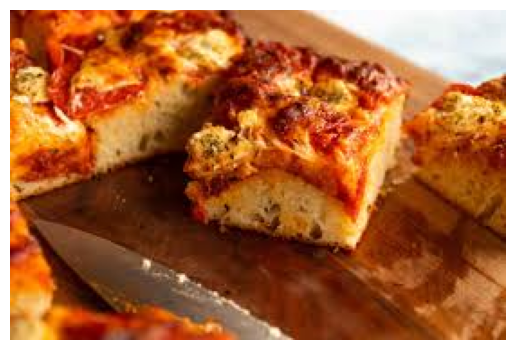

In [25]:
pizza_1 = plt.imread('pizza_1.jpg')
plt.imshow(pizza_1)
plt.axis(False)

(np.float64(-0.5), np.float64(147.5), np.float64(147.5), np.float64(-0.5))

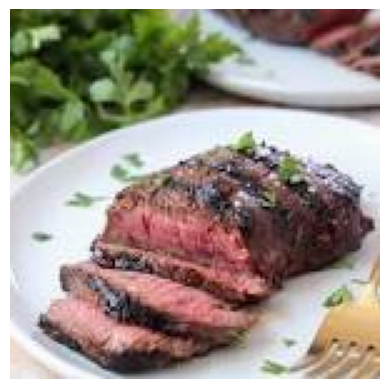

In [26]:
steak_1 = plt.imread('steak_1.jpg')
plt.imshow(steak_1)
plt.axis(False)

In [27]:
# Loading Pizza images
pizza_1 = plt.imread('pizza_1.jpg')
pizza_2 = plt.imread('pizza_2.jpg')
pizza_3 = plt.imread('pizza_3.jpg')

In [28]:
# Loading Steak images
steak_1 = plt.imread('steak_1.jpg')
steak_2 = plt.imread('steak_2.jpg')
steak_3 = plt.imread('steak_3.jpg')

In [29]:
pizza_1.shape

(183, 275, 3)

## When you train a neural network and you want to predict with your own custom data, it is important to preprocess your custom data into the same format as the data your model was trained on.

In [30]:
def load_img(np_image, img_shape=224):
  # Convert numpy to tensor
  img = tf.convert_to_tensor(np_image, dtype=tf.float32)

  # Resize properly to (224, 224)
  img = tf.image.resize(img, [img_shape, img_shape])

  # Rescale to 0-1
  img = img / 255.0

  return img


In [31]:
pizza_1 = load_img(pizza_1)

In [32]:
pizza_1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.31595764, 0.00133929, 0.        ],
        [0.3440476 , 0.0211397 , 0.        ],
        [0.3870273 , 0.05930497, 0.        ],
        ...,
        [0.9361084 , 0.95571625, 0.9714025 ],
        [0.9242472 , 0.95160186, 0.9647059 ],
        [0.92156863, 0.9529412 , 0.9647059 ]],

       [[0.36554632, 0.04336488, 0.02430855],
        [0.3742301 , 0.05229377, 0.00936654],
        [0.39276153, 0.06626479, 0.        ],
        ...,
        [0.9348828 , 0.9544907 , 0.970177  ],
        [0.92140234, 0.948757  , 0.961861  ],
        [0.9187237 , 0.9500963 , 0.961861  ]],

       [[0.41689444, 0.09185068, 0.06207708],
        [0.400386  , 0.0788174 , 0.02551734],
        [0.38858363, 0.06255075, 0.        ],
        ...,
        [0.9332083 , 0.9528161 , 0.9685024 ],
        [0.92032564, 0.9476803 , 0.9607843 ],
        [0.91764706, 0.9490196 , 0.9607843 ]],

       ...,

       [[0.7518646 , 0.5283352 , 0.21853125],
        [0.78

In [40]:
def predict(np_image):
  img = load_img(np_image) # PreProcess the images
  return model_6.predict(tf.expand_dims(img,axis =0))

In [46]:
predicting_1 = predict(pizza_1)
predicting_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.55277514]], dtype=float32)

In [47]:
predicting_2 = predict(pizza_2)
predicting_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.01025176]], dtype=float32)

In [48]:
predicting_3 = predict(pizza_3)
predicting_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.08246258]], dtype=float32)

In [49]:
predicting_4 = predict(steak_1)
predicting_4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.554082]], dtype=float32)

In [50]:
predicting_5 = predict(steak_2)
predicting_5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.99538463]], dtype=float32)

In [51]:
predicting_6 = predict(steak_3)
predicting_6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.99964285]], dtype=float32)

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to make prediction + plot
def predict_and_plot(model, np_image, class_names=["Pizza", "Steak"]):
    # Preprocess the image
    img = load_img(np_image)

    # Expand dims to add batch dimension
    img_batch = tf.expand_dims(img, axis=0)

    # Make prediction
    pred = model.predict(img_batch)

    # Get predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]  # round the sigmoid output 0 or 1

    # Get prediction confidence (as percentage)
    pred_confidence = pred[0][0] * 100  # because sigmoid gives value between 0-1

    # Plot
    plt.imshow(np_image)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class} ({pred_confidence:.2f}%)")
    plt.show()

    return pred_class, pred_confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


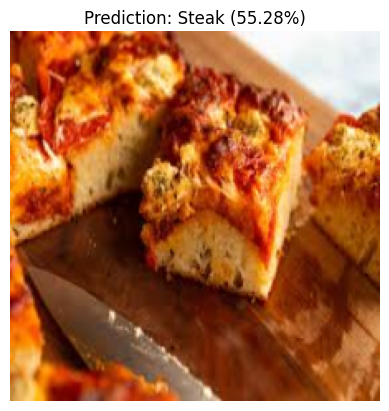

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


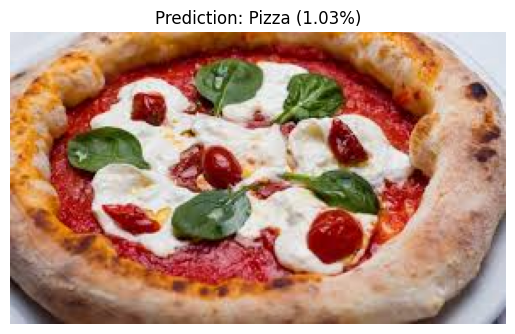

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


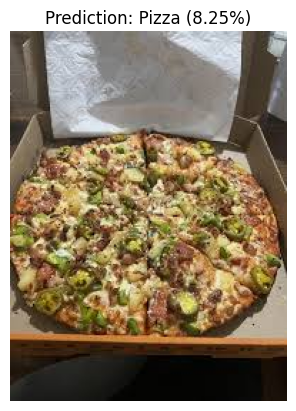

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


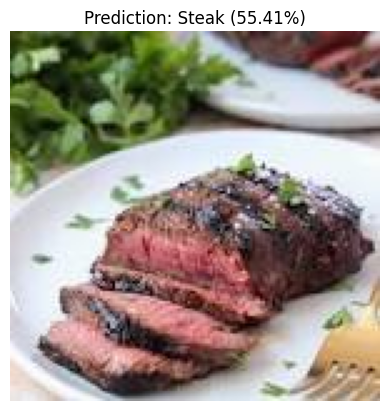

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


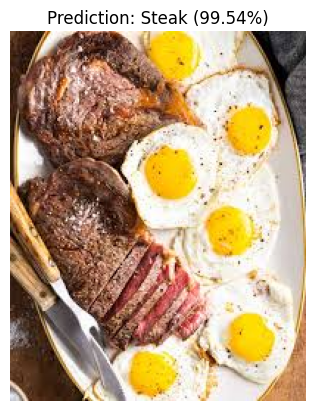

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


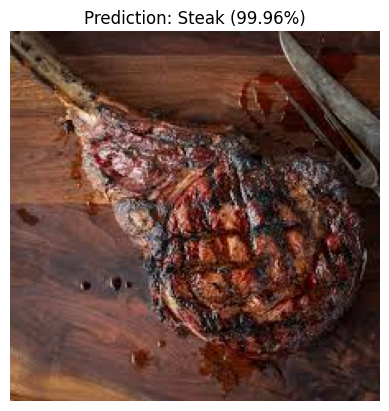

('Steak', np.float32(99.96429))

In [54]:
predict_and_plot(model_6, pizza_1)
predict_and_plot(model_6, pizza_2)
predict_and_plot(model_6, pizza_3)
predict_and_plot(model_6, steak_1)
predict_and_plot(model_6, steak_2)
predict_and_plot(model_6, steak_3)
